In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.special

In [2]:
def W_to_dBm(W):
    '''converts quantity in Watts to deciBel-milliWatts'''
    return (10*np.log10(W)) + 30

def dBm_to_W(dBm):
    '''converts quantity in deciBel-milliWatts to Watts'''
    return 10**((dBm - 30)/10)

In [3]:
#for a 120m x 120m grid, you cover approx. +/-30 degrees of the beam from boresight
altitude = 120
grid_dim = 60
#angle of interest: +/- 
(np.arctan(grid_dim/altitude))*180/np.pi

26.56505117707799

In [15]:
(np.arctan(grid_dim/altitude))*180/np.pi

120*np.tan(30*np.pi/180)

69.28203230275508

/tmp/ipykernel_1631/1078458211.py:17: RuntimeWarning: invalid value encountered in divide
  airy_2D = (2 * scipy.special.j1(rr) / rr)**2


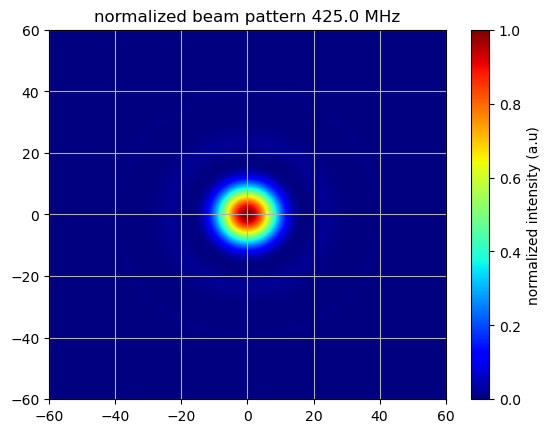

In [5]:
### 
xlim = 60 #for a 120m x 120m grid
x = np.linspace(-xlim, xlim, 1201)
y=x
freq = 425e6
lambda_wl = 3e8/freq 
D = 6
#sigma = 1.22*lambda_wl/D
#R = scipy.special.jn_zeros(1, 1)/np.pi
#R = 1
altitude = 120
xx, yy = np.meshgrid(x, y)

q = np.sqrt((xx**2) + (yy**2))
R = np.sqrt((xx**2) + (yy**2) + altitude**2)
rr = (np.pi*D/lambda_wl)*q/R
airy_2D = (2 * scipy.special.j1(rr) / rr)**2

#correction for RuntimeWarning: invalid value encountered in true_divide
#at (0,0), the intensity should 1
searchval = 0
ii =np.array( np.where(q == searchval))
airy_2D[ii[0][0]][ii[1][0]] = 1

#plt.pcolormesh(xx,yy,airy_2D, cmap='turbo', norm=colors.LogNorm(vmin=airy_2D.min(), vmax=airy_2D.max()))
plt.pcolormesh(xx,yy,airy_2D, cmap='jet')
plt.title('normalized beam pattern {} MHz'.format(freq/1e6))
plt.colorbar(label='normalized intensity (a.u)')
plt.grid()
plt.show()

In [ ]:
(np.arctan(grid_dim/altitude))*180/np.pi

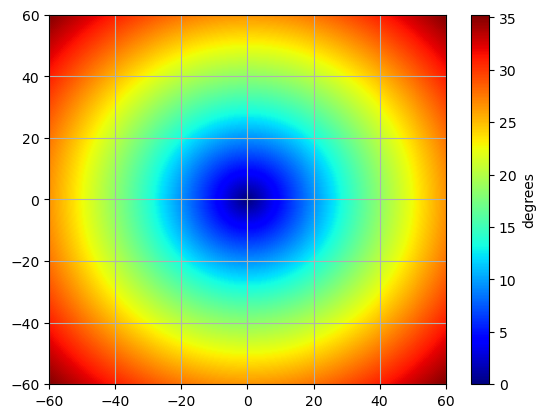

In [6]:
### xlim = 60 #for a 120m x 120m grid
x = np.linspace(-xlim, xlim, 1201)
y=x

altitude = 120
xx, yy = np.meshgrid(x, y)
#z = np.zeros((xx.shape[0],xx.shape[1]))
z = np.sqrt((xx**2)+(yy**2))
z = (np.arctan(z/altitude))*180/np.pi
plt.pcolormesh(xx,yy,z, cmap='jet')
plt.colorbar(label='degrees')
plt.grid()
plt.show()

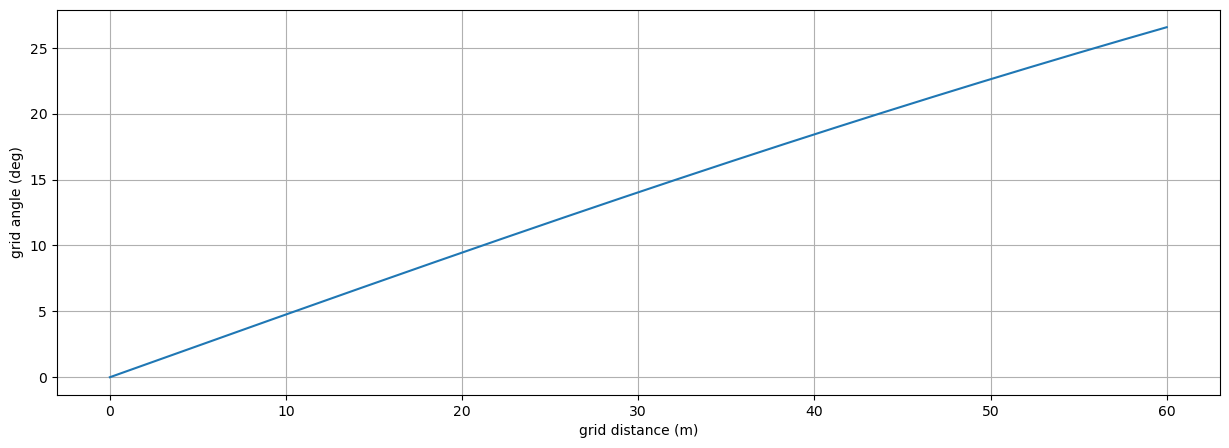

In [7]:

grid_length = 120
altitude = 120
grid_distance = np.linspace(0,grid_length/2,1001) 

grid_angle = (np.arctan(grid_distance/altitude))*180/np.pi

plt.figure(figsize=(15,5))
plt.plot(grid_distance, grid_angle)
#plt.ylim(0,2)

plt.title('')
plt.xlabel('grid distance (m)')
plt.ylabel('grid angle (deg)')
plt.grid()
plt.show()

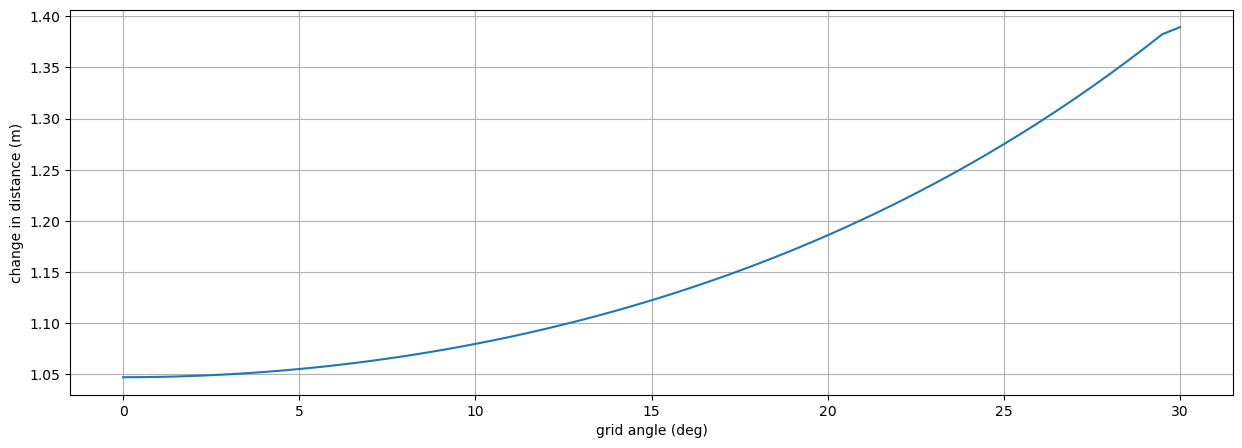

In [8]:
grid_angle = 60
altitude = 120
grid_angle = np.linspace(0,grid_angle/2,61) 

grid_distance = altitude*np.tan(grid_angle*np.pi/180)

plt.figure(figsize=(15,5))
#plt.plot(grid_angle, grid_distance)
plt.plot(grid_angle, np.gradient(grid_distance))
plt.title('')
plt.ylabel('change in distance (m)')
plt.xlabel('grid angle (deg)')
plt.grid()
plt.show()

In [9]:
for i in range(60):
    print(grid_distance[i+1]-grid_distance[i+0])

1.0472241348910547
1.0473836564950556
1.047702796916321
1.0481817507072964
1.0488208100117191
1.0496203649434968
1.0505809040931728
1.0517030151631337
1.052987385732962
1.054434804156669
1.056046160593752
1.0578224481765428
1.0597647643162844
1.061874312151092
1.064152402138948
1.0666004537994755
1.0692199976083607
1.0720126770490168
1.0749802508259911
1.078124595245452
1.08144770676833
1.0849517047420925
1.0886388343177025
1.0925114695587297
1.096572116750135
1.100823417914789
1.1052681545463479
1.1099092515677604
1.1147497815251484
1.1197929690278947
1.125042195445893
1.1305010038763328
1.1361731043926824
1.1420623795896105
1.1481728904387722
1.1545088824707364
1.1610747923000275
1.1678752545110456
1.1749151089239334
1.182199408260523
1.189733426232273
1.1975226660733398
1.2055728695431895
1.2138900264257302
1.2224803845525898
1.231350460381158
1.2405070501594722
1.2499572417122948
1.2597084268858296
1.2697683146896708
1.2801449451793872
1.2908467041241565
1.3018823385084062
1.313260

In [67]:
flight_time = 30 #mins
flight_time = flight_time * 60 #seconds
drone_speed = 1.5 #m/s

total_dist = drone_speed * flight_time
total_dist/100

27.0

In [70]:
#For a 120 x 120 m grid, if we make the grid space to be 1 meter apart and the drone flight speed to move 1 m/s,
#the required flight time is
grid_length = 120
#number of spaces:
grid_space = 1 
num_path = (grid_length / grid_space) + grid_length # + another length to close the grid
total_dist = grid_length*num_path + 2*grid_length # + 2*grid_length, the perpendicular side of flight path
drone_speed = 1.5
total_time = total_dist/drone_speed
print('total time (s):', total_time)
print('total time (min):', total_time/60)

total time (s): 19360.0
total time (min): 322.6666666666667


In [78]:
print('total number of flights:', total_time/60/30)

total number of flights: 10.755555555555556


In [72]:
flight_time = 30 #mins
flight_time = flight_time * 60 #seconds

drone_speed = total_dist/flight_time
print('drone speed (m/s):', drone_speed)

drone speed (m/s): 16.133333333333333


In [81]:
drone_speed = 1
grid_length = 120
total_dist = flight_time * drone_speed 
total_dist = total_dist - 2*grid_length
num_path = total_dist/grid_length
print('number of path in a grid:', num_path)

number of path in a grid: 13.0


In [83]:
drone_speed = 1.5
grid_length = 100
total_dist = flight_time * drone_speed 
total_dist = total_dist - 2*grid_length
num_path = total_dist/grid_length
print('number of path in a grid:', num_path)

number of path in a grid: 25.0


In [11]:
drone_speed = 1
grid_length = 120
flight_time = 30 #mins
flight_time = flight_time * 60 #seconds

total_dist = flight_time * drone_speed 
total_dist = total_dist - 2*grid_length
num_path = total_dist/grid_length
print('number of path in a grid:', num_path)

number of path in a grid: 13.0


In [16]:
drone_speed = 1
grid_length = 60
flight_time = 30 #mins
flight_time = flight_time * 60 #seconds

total_dist = flight_time * drone_speed 
total_dist = total_dist - 2*grid_length
num_path = total_dist/grid_length
print('number of path in a grid:', num_path)

number of path in a grid: 28.0
